# Project 9: An exploratory data analysis of the Quai Branly Museum's African collection

In [1]:
#Importing packages

import pandas as pd
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt




This project focuses on the restitution of Sub-Saharan African Arts collected during the trade slave and French colonialism to their countries of origin. Research has shown that over 90% of African material heritage is kept outside the continent in museums. This analysis is an extension of my research internship on the topic of restitution.



In [2]:
# read MR_combined.csv into a pandas dataframe
MR_all = pd.read_csv("MR_combined.csv")

# read independence.csv into a pandas dataframe
ind = pd.read_csv("independence.csv")

In [3]:
MR_all.head()

,Source.Name,Column1,id,item,period,dimensions,weight,attributes,origin1,origin2,origin3,details,ppri,exposed
0,afrique_du_sud.xls,1.0,70.1999.11.1,COSTUME DE JEUNE HOMME NON INITIÉ : PAGNE UMT...,deuxième moitié du 20e siècle,"115 x 200 x 0,2 cm",265,Coton (?). Armure toile quadrillée,Afrique,Afrique australe,"Afrique du sud Nguni du sud, Xhosa, sous-group...",Vendeur Axis gallery Inc. Ancienne collection ...,2,non
1,afrique_du_sud.xls,2.0,70.1999.11.2,COSTUME DE JEUNE HOMME NON INITIÉ : BROCHE IS...,deuxième moitié du 20e siècle,"13 x 7,5 x 0,5 cm",18,"Métal, verre, laine",Afrique,Afrique australe,"Afrique du sud Nguni du sud, Xhosa, sous-group...",Vendeur Axis gallery Inc. Ancienne collection ...,2,non
2,afrique_du_sud.xls,3.0,70.1999.11.3,COSTUME DE JEUNE HOMME NON INITIÉ : BROCHE IS...,deuxième moitié du 20e siècle,"11,3 x 6 x 1 cm",14,"Métal, perles de verre, laine",Afrique,Afrique australe,"Afrique du sud Nguni du sud, Xhosa, sous-group...",Vendeur Axis gallery Inc. Ancienne collection ...,2,non
3,afrique_du_sud.xls,4.0,70.1999.11.4,COSTUME DE JEUNE HOMME NON INITIÉ : CEINTURE ...,deuxième moitié du 20e siècle,6 x 104 x 1 cm,186,"Cuir, métal",Afrique,Afrique australe,"Afrique du sud Nguni du sud, Xhosa, sous-group...",Vendeur Axis gallery Inc. Ancienne collection ...,2,non
4,afrique_du_sud.xls,5.0,70.1999.11.5,COSTUME DE JEUNE HOMME NON INITIÉ : CEINTURE ...,deuxième moitié du 20e siècle,"26 x 25,2 x 6 cm",163,"Cuir, métal",Afrique,Afrique australe,"Afrique du sud Nguni du sud, Xhosa, sous-group...",Vendeur Axis gallery Inc. Ancienne collection ...,2,non


### Preliminary Cleaning


In [76]:

# Mutate Source.Name column to extract country names
MR_all['Source.Name'] = MR_all['Source.Name'].apply(lambda x: re.sub('.xls', '', x))
MR_all.rename(columns={'Source.Name': 'Country'}, inplace=True)

MR_all.head()
#Remove South Africa duplicates
MR_all = MR_all[MR_all['Country'] != 'afrique_du_sudx']

# Count objects by country and ID

country_count = MR_all.groupby(['Country']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
id_count = MR_all.groupby(['id', 'Country']).size().reset_index(name='counts')


In [77]:
# Making sure the data types are correct
print(MR_all.dtypes)
MR_all['period'] = MR_all['period'].astype(str)


Country        object
Column1       float64
id             object
item           object
period         object
dimensions     object
weight         object
attributes     object
origin1        object
origin2        object
origin3        object
details        object
ppri            int64
exposed        object
dtype: object


In [78]:

# number of objects by date
df_period = MR_all.groupby('period')['period'].count().sort_values(ascending=False)

# clean period3
MR_all['period3'] = np.where(~MR_all['period'].str.contains('/|-'), MR_all['period'].str.replace('[^0-9]+', ''), MR_all['period'])

# Extracting acquisition date from the id column 
MR_all['period5'] = MR_all['id'].str.extract(r'^.*?[.](\w+).*', expand=False)

# replacing numbers with more than 5 digits with numbers in period3
MR_all['period5'] = np.where(MR_all['period5'].str.len() > 5, MR_all['period3'], MR_all['period5'])

# convert period5 to date format
MR_all['period5'] = pd.to_datetime(MR_all['period5'], errors='coerce')

MR_all.head()


C:\Users\Aby Ramata\AppData\Local\Temp\ipykernel_25028\2765093410.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  MR_all['period3'] = np.where(~MR_all['period'].str.contains('/|-'), MR_all['period'].str.replace('[^0-9]+', ''), MR_all['period'])


,Country,Column1,id,item,period,dimensions,weight,attributes,origin1,origin2,origin3,details,ppri,exposed,period3,period5
0,afrique_du_sud,1.0,70.1999.11.1,COSTUME DE JEUNE HOMME NON INITIÉ : PAGNE UMT...,deuxième moitié du 20e siècle,"115 x 200 x 0,2 cm",265,Coton (?). Armure toile quadrillée,Afrique,Afrique australe,"Afrique du sud Nguni du sud, Xhosa, sous-group...",Vendeur Axis gallery Inc. Ancienne collection ...,2,non,20,1999-01-01
1,afrique_du_sud,2.0,70.1999.11.2,COSTUME DE JEUNE HOMME NON INITIÉ : BROCHE IS...,deuxième moitié du 20e siècle,"13 x 7,5 x 0,5 cm",18,"Métal, verre, laine",Afrique,Afrique australe,"Afrique du sud Nguni du sud, Xhosa, sous-group...",Vendeur Axis gallery Inc. Ancienne collection ...,2,non,20,1999-01-01
2,afrique_du_sud,3.0,70.1999.11.3,COSTUME DE JEUNE HOMME NON INITIÉ : BROCHE IS...,deuxième moitié du 20e siècle,"11,3 x 6 x 1 cm",14,"Métal, perles de verre, laine",Afrique,Afrique australe,"Afrique du sud Nguni du sud, Xhosa, sous-group...",Vendeur Axis gallery Inc. Ancienne collection ...,2,non,20,1999-01-01
3,afrique_du_sud,4.0,70.1999.11.4,COSTUME DE JEUNE HOMME NON INITIÉ : CEINTURE ...,deuxième moitié du 20e siècle,6 x 104 x 1 cm,186,"Cuir, métal",Afrique,Afrique australe,"Afrique du sud Nguni du sud, Xhosa, sous-group...",Vendeur Axis gallery Inc. Ancienne collection ...,2,non,20,1999-01-01
4,afrique_du_sud,5.0,70.1999.11.5,COSTUME DE JEUNE HOMME NON INITIÉ : CEINTURE ...,deuxième moitié du 20e siècle,"26 x 25,2 x 6 cm",163,"Cuir, métal",Afrique,Afrique australe,"Afrique du sud Nguni du sud, Xhosa, sous-group...",Vendeur Axis gallery Inc. Ancienne collection ...,2,non,20,1999-01-01


In [79]:

# number of objects by country and by date
df_period5_fresh = pd.DataFrame(MR_all.groupby(['period5', 'Country']).size().reset_index(name='n'))

# filter unwanted values from period5 column
regex_pattern = r'^9|^5|^6|^4|^3|^7|^8|^21|^22|^23|^24|^25|^26|^27|^28|^29|^202|^205|^206'
df_period5_fresh = df_period5_fresh[~df_period5_fresh['period5'].astype(str).str.contains(regex_pattern)]


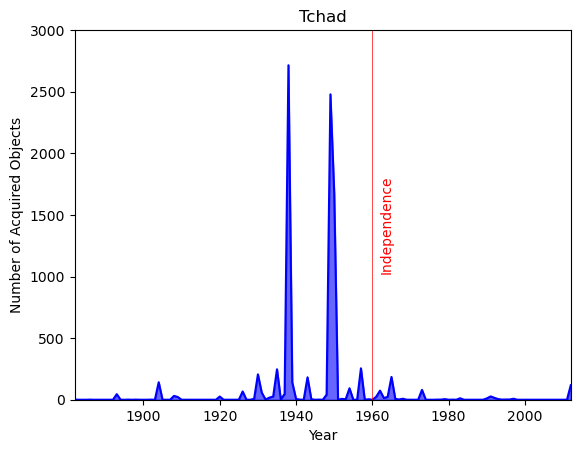

In [80]:


# get data for Tchad
df_tchad = df_period5_fresh[df_period5_fresh['Country']=='tchad'].reset_index(drop=True)

# convert period5 to date format
df_tchad['period5'] = pd.to_datetime(df_tchad['period5'])

# create a sequence of dates for complete years from min to max period5
min_period5 = min(df_tchad['period5'])
max_period5 = max(df_tchad['period5'])
df_year = pd.DataFrame({'period5': pd.date_range(start=min_period5, end=max_period5, freq='AS')})

# merge df_tchad with df_year to get 0 count for missing years
df_tchad = pd.merge(df_year, df_tchad, on='period5', how='outer').fillna({'n': 0})

# create a line plot
plt.plot(df_tchad['period5'], df_tchad['n'], color='blue')
plt.fill_between(df_tchad['period5'], df_tchad['n'], color='blue', alpha=0.6)
plt.xlim([min_period5, max_period5])
plt.ylim([0, 3000])
plt.xlabel('Year')
plt.ylabel('Number of Acquired Objects')
plt.title('Tchad')
plt.axvline(x=pd.to_datetime('1960-01-01'), color='red', linewidth=0.5)
plt.annotate('Independence', xy=(pd.to_datetime('1962-01-01'), 1050), xytext=(pd.to_datetime('1962-01-01'), 1050), color='red', rotation=90)
plt.show()






In [81]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install stop-words

Note: you may need to restart the kernel to use updated packages.


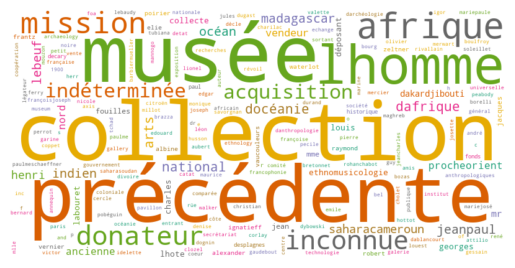

In [84]:
# Importing required libraries
import re
from collections import Counter
from wordcloud import WordCloud
from stop_words import get_stop_words

# get the details column from MR_all
provenance = MR_all['details']

# filter out non-string values
provenance_str = [str(text) for text in provenance if isinstance(text, str)]

# join all documents into one string
all_text = ' '.join(provenance_str)

# convert to lower case and remove punctuation
all_text = re.sub(r'[^\w\s]', '', all_text.lower())

# remove stop words
stop_words = get_stop_words('french')
all_text = ' '.join([word for word in all_text.split() if word not in stop_words])

# create a word frequency dictionary
word_freq = dict(Counter(all_text.split()))

# create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200,
                      colormap='Dark2', relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(word_freq)

# plot the word cloud
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()






The time series plot reveals that objects in Tchad were acquired in large numbers before the independence and during military occupations.

Most of the objects were acquired at the previous collection of Musee de L'Homme, mission and donations.
